In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt
import math

In [2]:
Apartial = np.loadtxt(open("LP_CentralPath/A.csv", "rb"), delimiter=",")
bpartial = np.loadtxt(open("LP_CentralPath/b.csv", "rb"), delimiter=",")

c = np.loadtxt(open("LP_CentralPath/c.csv", "rb"), delimiter=",")


A = np.concatenate((Apartial, -np.eye(Apartial.shape[1])), axis=0)
b = np.concatenate((bpartial, np.zeros(Apartial.shape[1])), axis=0)

print(A.shape)
print(b.shape)
print(c.T.shape)

(150, 50)
(150,)
(50,)


In [3]:
def F(A, b, x):
    f = 0
    
    for i in range(A.shape[0]):
        f += -math.log(b[i] - np.dot(A[i,:], x))
    
    return f

In [4]:
def grad(A, b, x):
    
    g = 0
    for i in range(A.shape[0]):
        g += A[i,:]/(b[i] - np.dot(A[i,:],x))
    
    return g

In [5]:
def hess(A, b, x):
    h = np.zeros((A.shape[1],A.shape[1]))
    
    for i in range(A.shape[0]):
        h += np.outer(A[i,:], A[i,:])/(b[i] - np.dot(A[i,:], x))**2
    
    return h

In [6]:
def newton(A, b, x):
    eta = 1
    alpha = 0.01
    beta = 0.5
    
    hess_inv = la.inv(hess(A, b, x))
    g = grad(A, b, x)
    
    nstep = np.dot(hess_inv, g)
    
    
   # while F(A, b, x - eta*nstep) > F(A, b, x) + eta*alpha*np.dot(nstep, nstep):
   #     eta = beta*eta
    
    xlast = x
    x = x - eta*nstep
    
    return x, xlast

In [7]:
def descent(update, A, b):
    T = 100
    tol = 1e-10
    
    x = 1e-10*np.ones(A.shape[1])
    
    for t in range(T):
        x, xlast = update(A, b, x)
        #print(dec)
        #print(la.norm(x - xlast))
        
        if la.norm(x - xlast) <= tol:
            return x, t
    
    return x, t

In [8]:
x_ac, t = descent(newton, A, b)

In [9]:
print(x_ac)

[ 0.01343451  0.01442539  0.01270989  0.01213139  0.01291663  0.0128668
  0.01317289  0.01289747  0.01309005  0.01433221  0.0137398   0.01367206
  0.01502803  0.01377246  0.01258018  0.01230257  0.01272091  0.01405319
  0.01298585  0.01335999  0.01317942  0.01396543  0.01261476  0.01314049
  0.01322463  0.01347236  0.01390438  0.01168298  0.01263784  0.01359044
  0.0135553   0.01409548  0.01335851  0.01269613  0.01244717  0.01342687
  0.01229702  0.01341524  0.01292327  0.01302756  0.01276808  0.01425375
  0.0144004   0.01184512  0.0146739   0.01216388  0.0125059   0.01358754
  0.01264497  0.01383919]


In [10]:
from scipy.optimize import linprog

In [11]:
x_lp = linprog(c, A_ub=A, b_ub=b)
print(x_lp.x)

[  0.00000000e+00   6.00792928e-02   1.13930520e-01   9.89419984e-03
  -1.63867516e-18   1.47563287e-03   0.00000000e+00   1.91668932e-02
   2.91075047e-02   3.10321767e-02   4.26145969e-02   5.93074258e-02
   1.59867580e-01   5.32509765e-02   1.03487799e-01   0.00000000e+00
   3.17067576e-03   2.54798059e-02   2.21542366e-02   5.58414737e-02
   5.13687432e-02   4.71515793e-02   3.34125047e-02   4.17057831e-02
   1.99650020e-01   2.39360064e-02   1.28925296e-01   0.00000000e+00
   1.44304062e-02   6.07523769e-03   1.98332604e-02   2.95567840e-02
   2.15768736e-17   4.25134005e-02   7.66563008e-02   8.38873022e-02
   7.28932953e-03   1.15055039e-02   0.00000000e+00   0.00000000e+00
   1.79233952e-03   0.00000000e+00   1.05157913e-02   0.00000000e+00
   9.93116201e-02   1.03896507e-02   4.75367070e-02   6.76189404e-02
   3.25260652e-19   4.48736409e-02]


In [12]:
def f(A, b, x, c, t):
    f = t*np.dot(c, x) + F(A, b, x)
    
    return f

In [13]:
def gradf(A, b, x, c, t):
    g = t*c + grad(A, b, x)
    
    return g

In [14]:
def newton2(A, b, x, c, t):
    eta = 0.1
    alpha = 0.05
    beta = 0.8
    
    hess_inv = la.inv(hess(A, b, x))
    g = gradf(A, b, x, c, t)
    
    nstep = np.dot(hess_inv, g)
    dec = np.dot(g, nstep)
    
    #while f(A, b, x + eta*nstep, c, t) > f(A, b, x, c, t) + eta*alpha*np.dot(g, nstep):
        #eta = beta*eta
    
    x = x - eta*nstep
    
    return x, dec

In [15]:
def descent2(update, A, b, x, c, a, xstar):
    
    m = 1
    eps = 1e-5
    t = 0.1
    
    error = []
    error.append(la.norm(x))
    T = 100
    tol = 1e-5
    o = 0
    
    while m/t > eps or o > 50:
        # Newton Step
        y = x
        for i in range(T):
            y, dec = update(A, b, y, c, t)
            #print(dec)
        
            error.append(la.norm(y - xstar))
        
            if dec/2 <= tol:
               break;
        t = (1 + a)*t
        x = y
        o += 1
    
    return x, error

In [16]:
x0, error0 = descent2(newton2, A, b, x_ac, c, 0.5, x_lp.x)
x1, error1 = descent2(newton2, A, b, x_ac, c, 1, x_lp.x)
x2, error2 = descent2(newton2, A, b, x_ac, c, 2, x_lp.x)

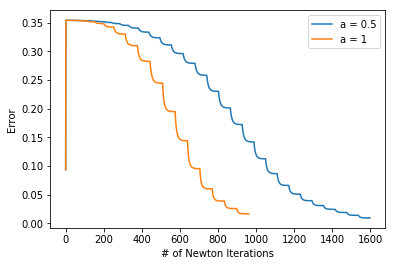

In [17]:
%matplotlib inline

plt.plot(error0, label="a = 0.5")
plt.plot(error1, label="a = 1")
plt.xlabel("# of Newton Iterations")
plt.ylabel("Error")
plt.legend()